In [1]:
from keras.applications.vgg16 import VGG16 
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from numpy import linalg as LA
import os
from keras.preprocessing import image
import pickle
from sklearn.decomposition import PCA

C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
add = 'C:\\Users\\USER\\Desktop\\VOCdevkit\\VOC2012\\JPEGImages'
model = VGG16(weights='imagenet', include_top=False)

In [ ]:
'''
vectors = []
for file in list(filter(lambda file: file[-4:] == '.jpg',os.listdir(add))):
    img_path =  add+'\\'   
    img = image.load_img(img_path+file, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    features = features[0]/LA.norm(features[0])
    features= features.ravel()
    features=list(map(float,features))
    vectors.append(features)
    
'''

In [242]:
# with open('C:\\Users\\USER\\Desktop\\vectors','wb') as f:
#     pickle.dump(vectors, f)

In [3]:
with open('C:\\Users\\USER\\Desktop\\VOCdevkit\\vectors2','rb') as f:
    vectors = pickle.load(f)
len(vectors)

17125

In [5]:
with open('C:\\Users\\USER\\Desktop\\VOCdevkit\\vectors1','rb') as f:
    vectors1 = pickle.load(f)
len(vectors1)

4058

In [7]:
with open('C:\\Users\\USER\\Desktop\\vectors2','wb') as f:     
    pickle.dump(vectors0, f)

In [4]:
# This program demos how to connect to Milvus vector database, 
# create a vector collection,
# insert 10 vectors, 
# and execute a vector similarity search.
import sys
sys.path.append(".")
import random
from milvus import Milvus, IndexType, MetricType

# Milvus server IP address and port.
# You may need to change _HOST and _PORT accordingly.
_HOST = '127.0.0.1'
#_HOST = '192.168.1.107'
_PORT = '19530'  # default value

# Vector parameters
_DIM = 25088#128  # dimension of vector

_INDEX_FILE_SIZE = 32  # max file size of stored index

milvus = Milvus()

# Connect to Milvus server
# You may need to change _HOST and _PORT accordingly
param = {'host': _HOST, 'port': _PORT}
status = milvus.connect(**param)
if status.OK():
    print("Server connected.")
else:
    print("Server connect fail.")
    sys.exit(1)

Server connected.


In [7]:
# Create collection demo_collection if it dosen't exist.
collection_name = 'example_collection'

status, ok = milvus.has_collection(collection_name)
if not ok:
    param = {
        'collection_name': collection_name,
        'dimension': _DIM,
        'index_file_size': _INDEX_FILE_SIZE,  # optional
        'metric_type': MetricType.L2  # optional
    }

    milvus.create_collection(param)

# Show collections in Milvus server
_, collections = milvus.show_collections()

# present collection info
_, info = milvus.collection_info(collection_name)
print(info)

# Describe demo_collection
_, collection = milvus.describe_collection(collection_name)
print(collection)

ids = []
for i in range(len(vectors)//1000+1):
    if 1000*i+1000 < len(vectors):
        status, ids0 = milvus.insert(collection_name=collection_name, records=vectors[1000*i:1000*i+1000])
    else:
        status, ids0 = milvus.insert(collection_name=collection_name, records=vectors[1000*i:])
    ids.extend(ids0)

TableInfo(count: 52592, partitions_stat: [PartitionStat(tag: '_default', count: 52592, segments_stat: [SegmentStat(segment_name: '1589792715244776000', count: 1000, index_name: 'IVFFLAT', data_size: 101965922), SegmentStat(segment_name: '1589792774779860000', count: 1337, index_name: 'IVFFLAT', data_size: 136289042), SegmentStat(segment_name: '1589792780502196000', count: 1337, index_name: 'IVFFLAT', data_size: 136289042), SegmentStat(segment_name: '1589792782362407000', count: 1205, index_name: 'IVFFLAT', data_size: 122840802), SegmentStat(segment_name: '1589792955399239000', count: 1337, index_name: 'IVFFLAT', data_size: 136289042), SegmentStat(segment_name: '1589792958752088000', count: 421, index_name: 'IVFFLAT', data_size: 42853882), SegmentStat(segment_name: '1589792961136971000', count: 1337, index_name: 'IVFFLAT', data_size: 136289042), SegmentStat(segment_name: '1589792963468075000', count: 1252, index_name: 'IVFFLAT', data_size: 127658082), SegmentStat(segment_name: '15897943

In [8]:
# Flush collection  inserted data to disk.
milvus.flush([collection_name])

# Get demo_collection row count
status, result = milvus.count_collection(collection_name)

# create index of vectors, search more rapidly
index_param = {
    'nlist': 2048
}

# Create ivflat index in demo_collection
# You can search vectors without creating index. however, Creating index help to
# search faster
print("Creating index: {}".format(index_param))
status = milvus.create_index(collection_name, IndexType.IVF_FLAT, index_param)

# describe index, get information of index
status, index = milvus.describe_index(collection_name)
print(index)

Creating index: {'nlist': 2048}
(collection_name='example_collection', index_type=<IndexType: IVFLAT>, params={'nlist': 2048})


In [9]:
pic_dic = dict(zip(ids,list(filter(lambda file: file[-4:] == '.jpg',os.listdir(add)))))

In [10]:
img_path =  add+'\\2010_001697.jpg'   
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
f0 = model.predict(x)
f0 = f0[0]/LA.norm(f0[0])
f0= f0.ravel()
f0=list(map(float,f0))

In [11]:
# Use the top 10 vectors for similarity search
query_vectors = [f0]

# execute vector similarity search
search_param = {
    "nprobe": 16
}
param = {
    'collection_name': collection_name,
    'query_records': query_vectors,
    'top_k': 100,
    'params': search_param
}
print("Searching ... ")
status, results = milvus.search(**param)


# print results
print(results)

Searching ... 
[
[
(id:1589856184693976662, distance:0.0),
(id:1589811362914147662, distance:0.0),
(id:1589796501944878662, distance:0.0),
(id:1589811305996813451, distance:1.0033702850341797),
(id:1589796452817268451, distance:1.0033702850341797),
(id:1589856120936928451, distance:1.0033702850341797),
(id:1589856168938706892, distance:1.0733599662780762),
(id:1589796489452979892, distance:1.0733599662780762),
(id:1589811348012867892, distance:1.0733599662780762),
(id:1589856152236023664, distance:1.0892980098724365),
(id:1589811334211711664, distance:1.0892980098724365),
(id:1589796476513046664, distance:1.0892980098724365),
(id:1589856090336870220, distance:1.099799394607544),
(id:1589811272407279220, distance:1.099799394607544),
(id:1589796427245100220, distance:1.099799394607544),
(id:1589856106318612778, distance:1.1028354167938232),
(id:1589811285684047778, distance:1.1028354167938232),
(id:1589796439596272778, distance:1.1028354167938232),
(id:1589811305996813581, distance:1.103

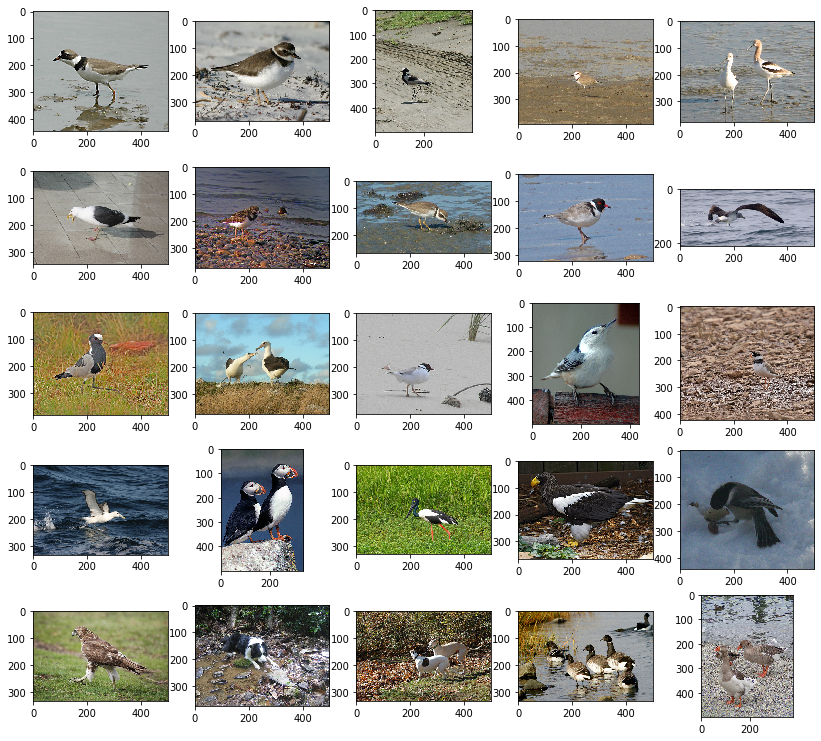

In [15]:
import matplotlib.pyplot as plt
k = 100
count = 0
fig=plt.figure(figsize=(14,13))
for i in range(k):
    if count+1<=25 and results[0][i].id in pic_dic:
        img_path = add+'\\'+ pic_dic[results[0][i].id]
        img = image.load_img(img_path)#, target_size=(524, 524)
        ax = plt.subplot(5, 5, count + 1)
        count += 1
        ax.imshow(img)

In [182]:
# Delete demo_collection
status = milvus.drop_collection(collection_name)

# Disconnect from Milvus
status = milvus.disconnect()

Searching ... 
[
[
(id:1589728356954585000, distance:0.0),
(id:1589728356954585001, distance:0.7142237424850464),
(id:1589728356954585002, distance:1.2159247398376465)
]
]
